In [1]:
import pandas as pd
import json 
import urllib2
import networkx as nx 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import community
import shapefile as shp
import os
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#using data from harvard center for international development
url = 'https://raw.githubusercontent.com/cid-harvard/globe/master/data/countries.json'
request= urllib2.urlopen(url)
data=json.loads(request.read())

In [3]:
#creating graphs  
G= nx.DiGraph()

In [4]:
#adding keys to graphs
set=data['trade'].keys()
G.add_nodes_from(set)

In [5]:
#saving countries in data to countries variable
countries=data['countries']

In [6]:
#getting coordinates of the countries
CountryPos={}
for c in countries.keys():
    CountryPos[c]=(float(countries[c]['lat']),float(countries[c]['lon']))

In [7]:
#making sure it worked
CountryPos

{u'AE': (54.0, 24.0),
 u'AL': (20.0, 41.0),
 u'AO': (18.5, -12.5),
 u'AR': (-64.0, -34.0),
 u'AT': (13.333, 47.333333),
 u'AU': (135.0, -25.0),
 u'AZ': (47.5, 40.5),
 u'BA': (17.833333, 44.25),
 u'BD': (90.0, 24.0),
 u'BE': (4.0, 50.833333),
 u'BG': (25.0, 43.0),
 u'BO': (-65.0, -17.0),
 u'BR': (-55.0, -10.0),
 u'BY': (28.0, 53.0),
 u'CA': (-96.0, 60.0),
 u'CG': (15.0, -1.0),
 u'CH': (8.0, 47.0),
 u'CI': (-5.0, 8.0),
 u'CL': (-71.0, -30.0),
 u'CM': (12.0, 6.0),
 u'CN': (105.0, 35.0),
 u'CO': (-72.0, 4.0),
 u'CR': (-84.0, 10.0),
 u'CU': (-79.5, 22.0),
 u'CZ': (15.0, 49.75),
 u'DE': (10.5, 51.5),
 u'DK': (10.0, 56.0),
 u'DO': (-70.666667, 19.0),
 u'DZ': (3.0, 28.0),
 u'EC': (-77.5, -2.0),
 u'EE': (26.0, 59.0),
 u'EG': (30.0, 27.0),
 u'ES': (-4.0, 40.0),
 u'ET': (38.0, 8.0),
 u'FI': (26.0, 64.0),
 u'FR': (2.0, 46.0),
 u'GA': (11.75, -1.0),
 u'GB': (-4.0, 54.0),
 u'GE': (43.499, 41.999981),
 u'GH': (-2.0, 8.0),
 u'GN': (-10.0, 11.0),
 u'GR': (22.0, 39.0),
 u'GT': (-90.25, 15.5),
 u'HK': (1

In [8]:
#adding edges to graph--i.e. imports/exports
for country in set:
    for i in range (0,10):
        country2=data['trade'][country][i]['c']
        G.add_edge(country,country2)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


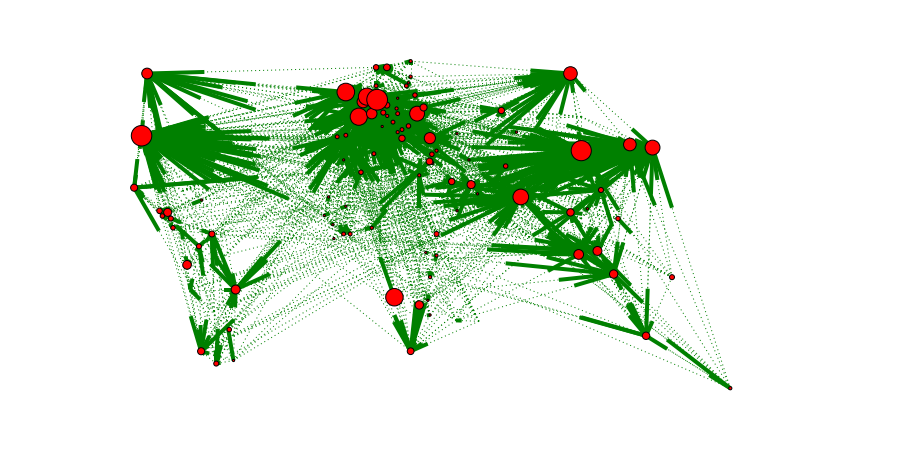

In [9]:
#basic visualization of network
plt.figure(figsize = (12,6))
nx.draw(G,pos=CountryPos,with_labels=False,style='dotted',edge_color='green',
        node_size=5*np.array(G.in_degree().values()))


# Calculating the centrality for different countries

### Creating a function to calculate centrality

In [10]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

### Degree Centrality

In [11]:
c1= nx.degree(G)
topdict(c1,10)

1|DE:96
2|US:94
3|CN:91
4|GB:72
5|IT:71
6|FR:69
7|NL:68
8|IN:59
9|JP:54
10|ES:54


### Eigenvector centrality

In [12]:
#eigenvector centrality
c2= nx.eigenvector_centrality(G)
topdict(c2,10)

1|CN:0.388161761885
2|US:0.385601524341
3|DE:0.357481617032
4|GB:0.312695546855
5|FR:0.280084764296
6|NL:0.257380700556
7|IT:0.218242148181
8|JP:0.213142650471
9|RU:0.198892561957
10|BE:0.168317287993


### Pagerank Centrality

In [13]:
c5 = nx.pagerank(G,0.80)
topdict(c5,10)

1|US:0.0664623101458
2|CN:0.0658211619979
3|DE:0.063050014576
4|GB:0.0533175955951
5|FR:0.0486699383036
6|NL:0.045269400234
7|IT:0.0406435670641
8|JP:0.036613561936
9|RU:0.0342260643571
10|IN:0.0301622349235


### Betweenness Centrality 

In [29]:
c3 = nx.betweenness_centrality(G)
topdict(c3,10)

1|TR:0.102477923705
2|GR:0.0930609573371
3|US:0.0881413546245
4|IR:0.0777991550892
5|RU:0.0765233955643
6|BR:0.0652180378677
7|MX:0.0613294721535
8|CN:0.0596389090939
9|CO:0.0572008602418
10|LB:0.0458206844233


### Closeneess Centrality 

In [15]:
c4 = nx.closeness_centrality(G)
topdict(c4,10)

1|PA:0.260541036988
2|GE:0.250458085204
3|EC:0.249480332587
4|TJ:0.246533127889
5|GR:0.245999211667
6|AZ:0.243216538725
7|LR:0.242130750605
8|CO:0.241506075381
9|CR:0.241506075381
10|SV:0.23611531477


Not surprisingly, there is some overlap with countries in the degrees centrality. The bigger players tend to be larger, more developed countries. But, for closeness and betweenness centrality the countries are smaller ones. 

# Visualizing the network of world trade and measures of centrality 

In [16]:
def most_important(G):
 """ returns a copy of G with
     the most important nodes
     according to the betweenness centrality """ 
 ranking = nx.betweenness_centrality(G).items()
 print ranking
 r = [x[1] for x in ranking]
 m = sum(r)/len(r) 
 t = m*3.6 # threshold, we keep only the nodes with 3.6 times the mean (keep only ~10 countries)
 Gt = G.copy()
 for k, v in ranking:
  if v < t:
   Gt.remove_node(k)
 return Gt

Gt = most_important(G) 

[(u'BD', 0.0), (u'BE', 0.006525474471141908), (u'BG', 0.0010415283285774375), (u'BA', 0.006109777437461053), (u'BO', 0.0), (u'JP', 0.025870800287431096), (u'JO', 0.0013008836753829842), (u'BR', 0.06521803786771048), (u'BY', 0.02848389095656944), (u'RU', 0.07652339556430784), (u'TJ', 0.001750485860655352), (u'GT', 0.0036064591299527515), (u'GR', 0.09306095733713002), (u'GE', 0.0), (u'GB', 0.028467719523866522), (u'GA', 0.0), (u'GN', 0.0008088941469355782), (u'GH', 0.0010222273260082908), (u'OM', 0.0015163953017060358), (u'TN', 0.0), (u'HR', 0.004920190194899131), (u'HU', 0.002962550724384627), (u'HK', 0.009730386950911519), (u'HN', 0.0005227474686548543), (u'PT', 0.009608432234464394), (u'PY', 0.0), (u'PA', 0.04144313723751694), (u'PG', 0.0), (u'PE', 0.0006686934249147275), (u'PK', 0.0025186304581782015), (u'PH', 0.0001699284185159891), (u'PL', 0.011926630807838318), (u'ZM', 0.000936693885411834), (u'EE', 0.00038265998658306447), (u'EG', 0.005061350789140868), (u'ZA', 0.0274715197976469

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


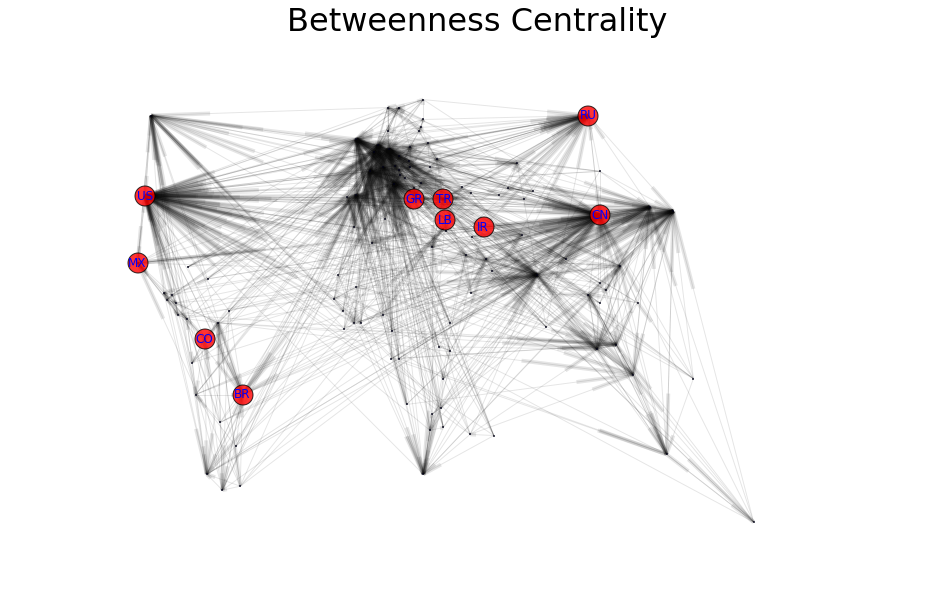

In [18]:
figure, ax = plt.subplots(figsize=(16,10))
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos=CountryPos,node_color='b',alpha=.8,node_size=1)
nx.draw_networkx_edges(G,pos=CountryPos,alpha=0.1)
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos=CountryPos,node_color='r',alpha=0.8,node_size=400)
# also the labels this time
nx.draw_networkx_labels(Gt,pos=CountryPos,font_size=12,font_color='b')
# Turn off the axis
plt.axis('off')
plt.title('Betweenness Centrality', fontsize=32)

In [20]:
def most_important2(G):
 """ returns a copy of G with
     the most important nodes
     according to the closeness centrality """ 
 ranking2 = nx.closeness_centrality(G).items()
 print ranking2
 r = [x[1] for x in ranking2]
 m = sum(r)/len(r) 
 t = m*1.112 # threshold, we keep only the nodes with 1.112 times the mean (keep only ~10 countries)
 Gt2 = G.copy()
 for k, v in ranking2:
  if v < t:
   Gt2.remove_node(k)
 return Gt2

Gt2 = most_important2(G) 

[(u'BD', 0.21782043427949083), (u'BE', 0.2011020171424889), (u'BG', 0.2340257987100645), (u'BA', 0.2090507134722315), (u'BO', 0.2213766862677274), (u'JP', 0.18428512372290795), (u'JO', 0.22602491670288283), (u'BR', 0.22037429378531073), (u'BY', 0.21071645620906204), (u'RU', 0.2231638418079096), (u'TJ', 0.2465331278890601), (u'GT', 0.2231638418079096), (u'GR', 0.2459992116673236), (u'GE', 0.2504580852038479), (u'GB', 0.20034026707755523), (u'GA', 0.1986713851120631), (u'GN', 0.20622543017335823), (u'GH', 0.21104003165600474), (u'OM', 0.20034026707755523), (u'TN', 0.20466901183242722), (u'HR', 0.2194598776285252), (u'HU', 0.1973501138375917), (u'HK', 0.2034224250325945), (u'HN', 0.22129636196014466), (u'PT', 0.2011020171424889), (u'PY', 0.211864406779661), (u'PA', 0.2605410369875595), (u'PG', 0.2000060968174613), (u'PE', 0.204999343056103), (u'PK', 0.21499931101005926), (u'PH', 0.19233080899146532), (u'PL', 0.2011020171424889), (u'ZM', 0.2011020171424889), (u'EE', 0.19958426606971538), (

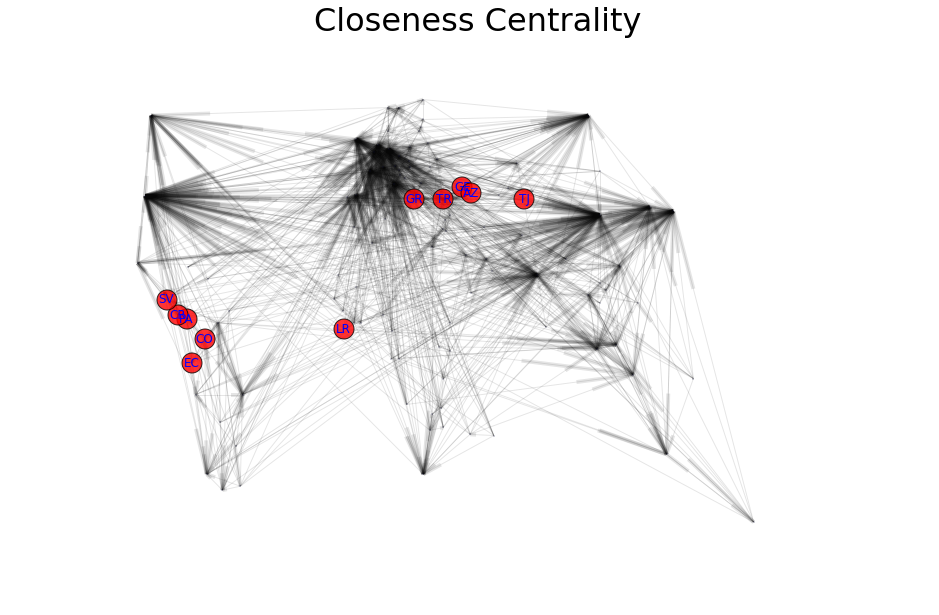

In [21]:
figure, ax = plt.subplots(figsize=(16,10))
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos=CountryPos,node_color='b',alpha=0.2,node_size=1)
nx.draw_networkx_edges(G,pos=CountryPos,alpha=0.1)
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt2,pos=CountryPos,node_color='r',alpha=0.8,node_size=400)
# also the labels this time
nx.draw_networkx_labels(Gt2,pos=CountryPos,font_size=12,font_color='b')
# Turn off the axis
plt.axis('off')
plt.title('Closeness Centrality', fontsize=32)

In [22]:
def most_important3(G):
 """ returns a copy of G with
     the most important nodes
     according to pagerank centrality """ 
 ranking3 = nx.pagerank(G,0.80).items()
 print ranking3
 r = [x[1] for x in ranking3]
 m = sum(r)/len(r) 
 t = m*3.5 # threshold, we keep only the nodes with 3.5 times the mean (keep only ~10 countries)
 Gt3 = G.copy()
 for k, v in ranking3:
  if v < t:
   Gt3.remove_node(k)
 return Gt3

Gt3 = most_important3(G) 

[(u'BD', 0.0016806722689075625), (u'BE', 0.029150649767414865), (u'BG', 0.0023755673442570407), (u'BA', 0.0021990443448715825), (u'BO', 0.0016806722689075625), (u'JP', 0.036613561935966855), (u'JO', 0.002034371730126004), (u'BR', 0.012055242753452808), (u'BY', 0.0052288965069423), (u'RU', 0.03422606435711536), (u'TJ', 0.0018268176844778653), (u'GT', 0.002876803245696834), (u'GR', 0.003076588179609375), (u'GE', 0.0016806722689075625), (u'GB', 0.05331759559510885), (u'GA', 0.0016806722689075625), (u'GN', 0.0018268176844778653), (u'GH', 0.0021424917837338667), (u'OM', 0.002363393329442368), (u'TN', 0.0016806722689075625), (u'HR', 0.0021990443448715825), (u'HU', 0.0030662635943538787), (u'HK', 0.019218034401566924), (u'HN', 0.0023402525224363833), (u'PT', 0.0044667741896715), (u'PY', 0.0016806722689075625), (u'PA', 0.002794114799740325), (u'PG', 0.0016806722689075625), (u'PE', 0.0024238427083039743), (u'PK', 0.002845847693725179), (u'PH', 0.0018151260504201674), (u'PL', 0.01086552864124287

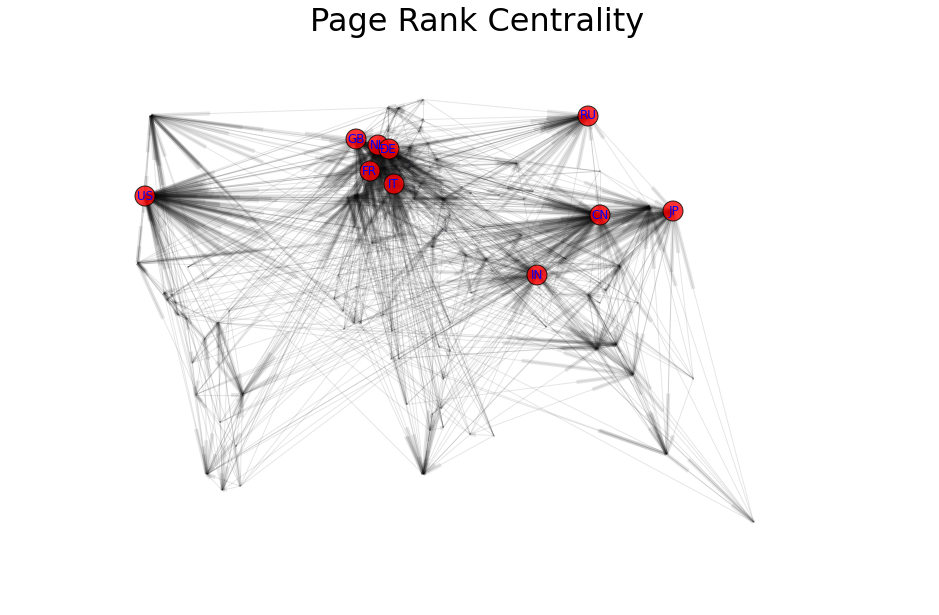

In [23]:
figure, ax = plt.subplots(figsize=(16,10))
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos=CountryPos,node_color='b',alpha=0.2,node_size=1)
nx.draw_networkx_edges(G,pos=CountryPos,alpha=0.1)
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt3,pos=CountryPos,node_color='r',alpha=0.8,node_size=400)
# also the labels this time
nx.draw_networkx_labels(Gt3,pos=CountryPos,font_size=12,font_color='b')
# Turn off the axis
plt.axis('off')
plt.title('Page Rank Centrality', fontsize=32)

In [24]:
def most_important4(G):
 """ returns a copy of G with
     the most important nodes
     according to eigenvector centrality """ 
 ranking4 = nx.eigenvector_centrality(G).items()
 print ranking4
 r = [x[1] for x in ranking4]
 m = sum(r)/len(r) 
 t = m*5 # threshold, we keep only the nodes with 5 times the mean (keep only ~10 countries)
 Gt4 = G.copy()
 for k, v in ranking4:
  if v < t:
   Gt4.remove_node(k)
 return Gt4

Gt4 = most_important4(G)

[(u'BD', 0.0), (u'BE', 0.1683172879931997), (u'FR', 0.28008476429636286), (u'BG', 9.035601446340512e-05), (u'BA', 9.433108524847413e-06), (u'BO', 0.0), (u'JP', 0.21314265047115474), (u'JO', 9.325829758187552e-06), (u'BR', 0.058516765218400095), (u'CR', 0.0002684121971235859), (u'FI', 0.006560035634939335), (u'BY', 0.022658111739720287), (u'RU', 0.19889256195656418), (u'AZ', 0.0), (u'NL', 0.25738070055628764), (u'NO', 0.008232516916339956), (u'NG', 8.393046866095502e-06), (u'NZ', 0.005825868666398167), (u'TM', 0.0), (u'MZ', 2.9367633304687675e-05), (u'LR', 0.0), (u'CI', 1.1581459991234308e-18), (u'GT', 0.0002836150530229492), (u'CO', 0.010683972002607822), (u'GR', 0.0008204978428563165), (u'CM', 0.0), (u'CL', 0.00785764557054029), (u'CA', 0.05363121351254902), (u'CG', 0.0), (u'SY', 9.325829758187552e-06), (u'CZ', 0.009808337833588003), (u'GE', 0.0), (u'GB', 0.31269554685457374), (u'GA', 0.0), (u'GN', 3.860486663744769e-19), (u'CU', 0.0), (u'GH', 1.9302433318723847e-18), (u'OM', 0.003561

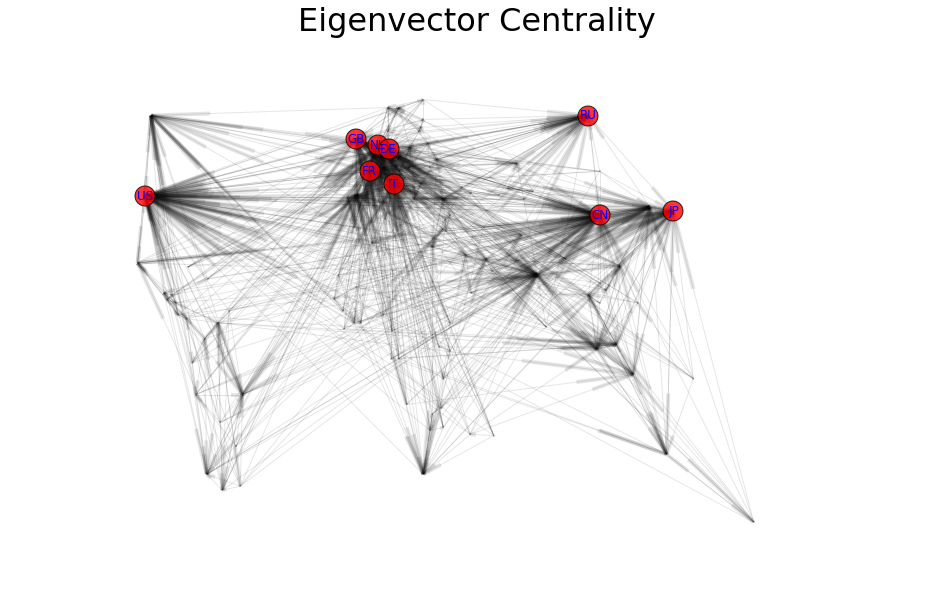

In [25]:
figure, ax = plt.subplots(figsize=(16,10))
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos=CountryPos,node_color='b',alpha=0.2,node_size=1)
nx.draw_networkx_edges(G,pos=CountryPos,alpha=0.1)
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt4,pos=CountryPos,node_color='r',alpha=0.8,node_size=400)
# also the labels this time
nx.draw_networkx_labels(Gt4,pos=CountryPos,font_size=12,font_color='b')
# Turn off the axis
plt.axis('off')
plt.title('Eigenvector Centrality', fontsize=32)

In [27]:
def most_important5(G):
 """ returns a copy of G with
     the most important nodes
     according to degree centrality """ 
 ranking5 = nx.degree(G).items()
 print ranking5
 r = [x[1] for x in ranking5]
 m = sum(r)/len(r) 
 t = m*4 # threshold, we keep only the nodes with 3 times the mean (keep only ~10 countries)
 Gt5 = G.copy()
 for k, v in ranking5:
  if v < t:
   Gt5.remove_node(k)
 return Gt3

Gt5 = most_important5(G) 

[(u'BD', 10), (u'BE', 39), (u'BG', 14), (u'BA', 13), (u'BO', 10), (u'JP', 54), (u'JO', 12), (u'BR', 26), (u'BY', 14), (u'RU', 47), (u'TJ', 11), (u'GT', 16), (u'GR', 18), (u'GE', 10), (u'GB', 72), (u'GA', 10), (u'GN', 11), (u'GH', 13), (u'OM', 11), (u'TN', 10), (u'HR', 13), (u'HU', 15), (u'HK', 23), (u'HN', 13), (u'PT', 14), (u'PY', 10), (u'PA', 15), (u'PG', 10), (u'PE', 14), (u'PK', 14), (u'PH', 11), (u'PL', 24), (u'ZM', 12), (u'EE', 12), (u'EG', 19), (u'ZA', 25), (u'EC', 12), (u'IT', 71), (u'VN', 15), (u'ET', 10), (u'ZW', 13), (u'ES', 54), (u'MD', 10), (u'MG', 11), (u'MA', 10), (u'UZ', 11), (u'ML', 11), (u'MN', 10), (u'MK', 13), (u'MU', 10), (u'MW', 11), (u'MR', 11), (u'UG', 11), (u'MY', 26), (u'MX', 20), (u'IL', 15), (u'FR', 69), (u'FI', 12), (u'NI', 15), (u'NL', 68), (u'NO', 16), (u'NG', 12), (u'NZ', 12), (u'CI', 13), (u'CH', 32), (u'CO', 15), (u'CN', 91), (u'CM', 10), (u'CL', 20), (u'CA', 33), (u'CG', 10), (u'CZ', 17), (u'CR', 14), (u'CU', 10), (u'SY', 12), (u'KG', 11), (u'KE', 12)

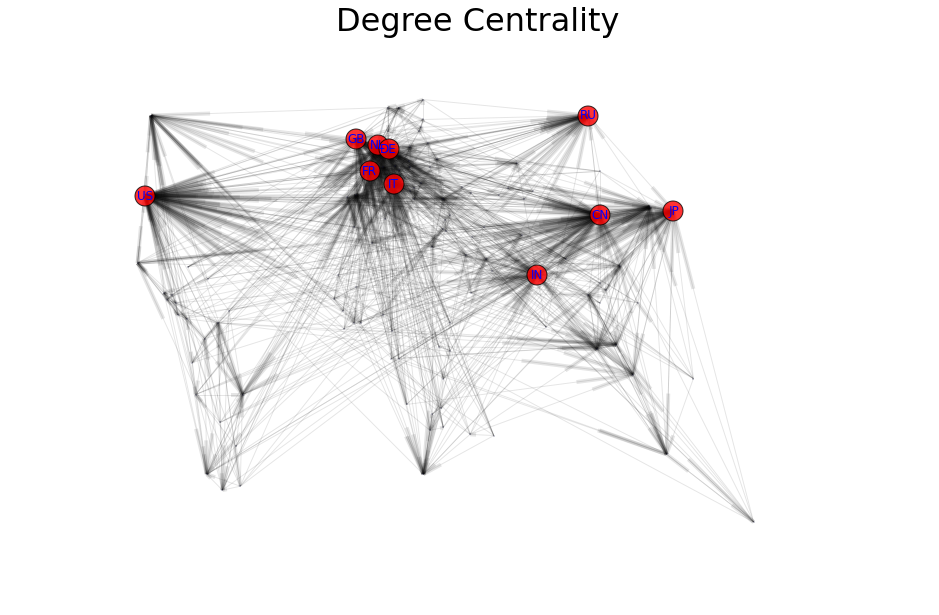

In [28]:
figure, ax = plt.subplots(figsize=(16,10))
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos=CountryPos,node_color='b',alpha=0.2,node_size=1)
nx.draw_networkx_edges(G,pos=CountryPos,alpha=0.1)
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt5,pos=CountryPos,node_color='r',alpha=0.8,node_size=400)
# also the labels this time
nx.draw_networkx_labels(Gt5,pos=CountryPos,font_size=12,font_color='b')
# Turn off the axis
plt.axis('off')
plt.title('Degree Centrality', fontsize=32)